In [2]:
import pandas as pd
import numpy as np



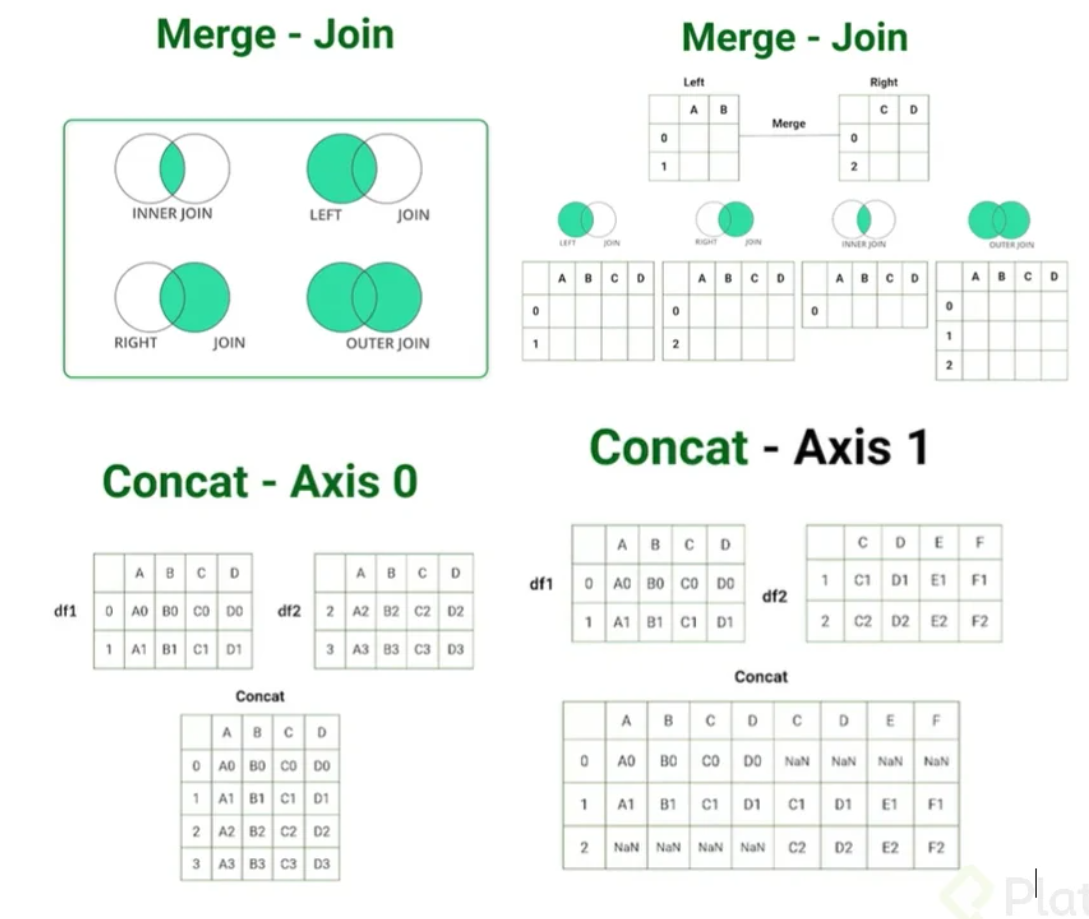

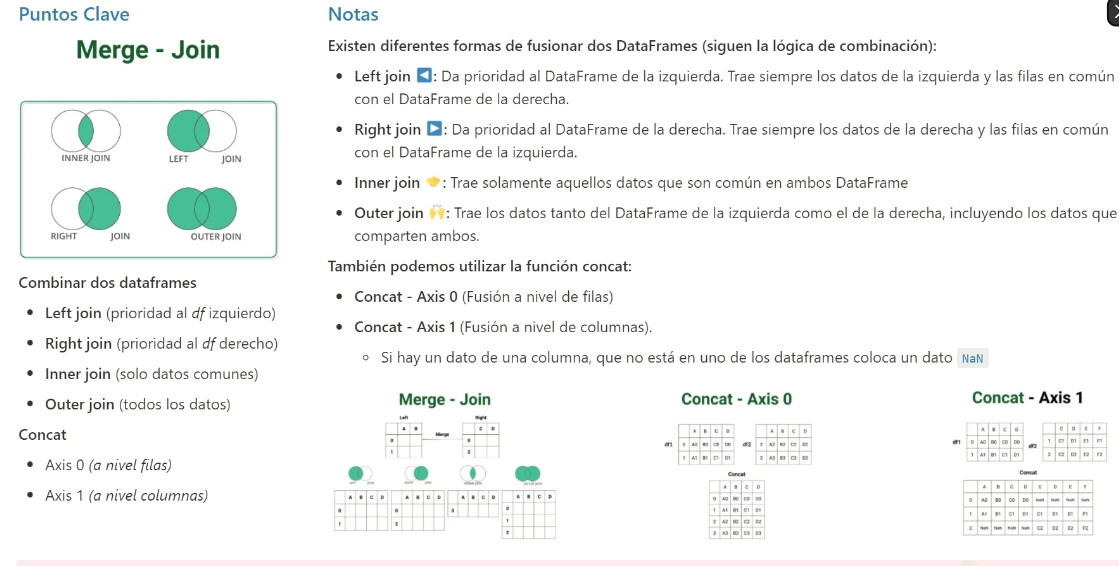

In [5]:
df1 = pd.DataFrame({'A':['A0', 'A1', 'A2','A3'],
    'B':['B0', 'B1', 'B2','B3'],
	'C':['C0', 'C1', 'C2','C3'],
	'D':['D0', 'D1', 'D2','D3']})


df2 = pd.DataFrame({'A':['A4', 'A5', 'A6','A7'],
	'B':['B4', 'B5', 'B6','B7'],
	'C':['C4', 'C5', 'C6','C7'],
	'D':['D4', 'D5', 'D6','D7']})
print(df1)
print(df2)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    A   B   C   D
0  A4  B4  C4  D4
1  A5  B5  C5  D5
2  A6  B6  C6  D6
3  A7  B7  C7  D7


## Contact()

In [7]:
pd.concat([df1, df2],ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [8]:
pd.concat([df1, df2], axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


## Merge()

In [10]:
izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
'A' : ['A0', 'A1', 'A2','A3'],
'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
'C' : ['C0', 'C1', 'C2','C3'],
'D': ['D0', 'D1', 'D2','D3']})
print(izq)
print(der)

  key   A   B
0  k0  A0  B0
1  k1  A1  B1
2  k2  A2  B2
3  k3  A3  B3
  key   C   D
0  k0  C0  D0
1  k1  C1  D1
2  k2  C2  D2
3  k3  C3  D3


In [11]:
izq.merge(der)

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [12]:
der.merge(izq)

,key,C,D,A,B
0,k0,C0,D0,A0,B0
1,k1,C1,D1,A1,B1
2,k2,C2,D2,A2,B2
3,k3,C3,D3,A3,B3


When the dataframe doesn't have the same columns, we need to expecify of follow way:

In [13]:
azul = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
'A' : ['A0', 'A1', 'A2','A3'],
'B': ['B0', 'B1', 'B2','B3']})

verde = pd.DataFrame({'key_2' : ['k0', 'k1', 'k2','k3'],
'C' : ['C0', 'C1', 'C2','C3'],
'D': ['D0', 'D1', 'D2','D3']})
print(azul)
print(verde)

  key   A   B
0  k0  A0  B0
1  k1  A1  B1
2  k2  A2  B2
3  k3  A3  B3
  key_2   C   D
0    k0  C0  D0
1    k1  C1  D1
2    k2  C2  D2
3    k3  C3  D3


In [14]:
verde.merge(azul)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [18]:
verde.merge(azul, left_on="key_2", right_on="key")

,key_2,C,D,key,A,B
0,k0,C0,D0,k0,A0,B0
1,k1,C1,D1,k1,A1,B1
2,k2,C2,D2,k2,A2,B2
3,k3,C3,D3,k3,A3,B3


Now, we we have null values in the dataframe, sometime is neccessary to merge these dataframe but, theses don't have similar values, is inthis way when we use merge with "how=" (left- inner - join - outer join), So, we can expecificate how we can do merge between the dataframes


In [25]:
izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
'A' : ['A0', 'A1', 'A2','A3'],
'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key_2' : ['k0', 'k1', 'k2',np.nan],
'C' : ['C0', 'C1', 'C2','C3'],
'D': ['D0', 'D1', 'D2','D3']})

In [27]:
izq.merge(der,left_on="key", right_on="key_2", how= "left")

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,NaN,NaN,NaN
